In [41]:
# !pip install pyarrow
import pandas as pd
data = pd.read_feather('train_data.ftr')

In [42]:
data.head(3)

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,...,NaN,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,...,NaN,NaN,0.003956,0.003166,0.005032,NaN,0.009575,0.005493,0.009216,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954102,0.091492,0.021652,1.009766,0.006817,0.123962,0.007599,0.009422,...,NaN,NaN,0.003269,0.007328,0.000427,NaN,0.003429,0.006985,0.002604,0


In [43]:
from sklearn.utils import shuffle
data=shuffle(data)
train=data[:500]
test=data[500:700]
train.head(3)

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
2931933,87613ee822b8472cdda5fc14d1489a914747dea88ff333...,2017-10-14,0.456787,0.009590,0.014038,0.819824,0.007820,0.180176,0.005802,0.003128,...,NaN,NaN,0.000727,0.003590,0.006584,NaN,0.005478,0.000078,0.006306,1
506614,179a6ebfaed0e566684db57e97c630450103ecc3e0daea...,2017-11-20,0.881348,0.124512,0.014366,1.005859,0.001984,0.017471,0.006195,0.009903,...,NaN,NaN,0.003862,0.001906,0.008652,NaN,0.007740,0.002863,0.002598,0
5474948,fd60fd38612355b04c5f0af6138a4751d1c9e6c654cf5d...,2017-07-07,0.810547,0.270752,0.243286,0.050537,0.507324,0.753418,0.005798,0.178833,...,NaN,NaN,0.002758,0.005478,0.000948,NaN,0.002821,0.005478,0.004013,1


In [44]:
train.describe()
grp=train.groupby('customer_ID').tail(1)
grp

/Users/krutikasarode/opt/anaconda3/lib/python3.9/site-packages/pandas/core/nanops.py:146: RuntimeWarning: Mean of empty slice
  result = bn_func(values, axis=axis, **kwds)


,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
2931933,87613ee822b8472cdda5fc14d1489a914747dea88ff333...,2017-10-14,0.456787,0.009590,0.014038,0.819824,0.007820,0.180176,0.005802,0.003128,...,NaN,NaN,0.000727,0.003590,0.006584,NaN,0.005478,0.000078,0.006306,1
506614,179a6ebfaed0e566684db57e97c630450103ecc3e0daea...,2017-11-20,0.881348,0.124512,0.014366,1.005859,0.001984,0.017471,0.006195,0.009903,...,NaN,NaN,0.003862,0.001906,0.008652,NaN,0.007740,0.002863,0.002598,0
5474948,fd60fd38612355b04c5f0af6138a4751d1c9e6c654cf5d...,2017-07-07,0.810547,0.270752,0.243286,0.050537,0.507324,0.753418,0.005798,0.178833,...,NaN,NaN,0.002758,0.005478,0.000948,NaN,0.002821,0.005478,0.004013,1
2695535,7c6a0bd179d158909f0194006a0c9a36dcd295797dd2d2...,2017-04-03,0.551270,0.002499,0.026154,1.006836,0.002697,0.161377,0.002399,0.013840,...,NaN,NaN,0.005341,0.001380,0.005650,NaN,0.007866,0.008621,0.009514,0
3333460,9a071481eb440c0031a4b28c27e671b261200f950c49e3...,2017-07-04,0.539551,0.003380,0.073853,1.005859,0.006710,0.105164,0.005688,0.023895,...,NaN,NaN,1.004883,0.001262,0.904297,0.370117,1.008789,0.632812,0.278809,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4427369,cca9f2dfb4c3e3e1b7b4f2a9aba2e2b3879674988741b3...,2017-03-02,0.632812,0.794434,0.209473,0.093323,0.258789,0.157715,0.006351,0.216797,...,NaN,NaN,0.006458,0.008369,0.007278,NaN,0.003876,0.004307,0.000312,1
3732998,ac81371d9d72dcc28776a26cbb5c8a47e718a9dab995ab...,2018-03-12,0.881348,0.008133,0.006496,0.812012,0.003645,NaN,0.009094,0.007889,...,NaN,NaN,0.008514,0.004238,0.003859,NaN,0.004166,0.008118,0.009216,0
1058454,30daa24d05a39c0638b74222b4c1c598d76016cf460529...,2017-11-28,0.806152,0.473877,0.111511,0.148071,0.002726,0.143433,0.006687,0.098816,...,NaN,NaN,0.005661,0.001627,0.008316,NaN,0.003960,0.002844,0.007256,0
4397879,cb3e2462367fa00ff875d2941c55429b7900a712b9593b...,2017-03-03,0.241943,0.008263,0.012367,0.817871,0.002880,0.229492,0.009819,0.005119,...,0.00898,0.000518,1.002930,0.001609,1.041016,0.829590,1.002930,0.803223,0.092957,1


In [45]:
print(len(train[train["target"]==1]))
len(train[train["target"]==0])
print(train.columns)

149
Index(['customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41',
       'B_3',
       ...
       'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143', 'D_144',
       'D_145', 'target'],
      dtype='object', length=191)


In [46]:
train=train.groupby('customer_ID').tail(1).set_index('customer_ID')
test=test.groupby('customer_ID').tail(1).set_index('customer_ID')

print(len(grp[grp['target']==1]))

149


In [47]:
print("training data begins on ",train["S_2"].min()," and ends on ",train["S_2"].max())

training data begins on  2017-03-02 00:00:00  and ends on  2018-03-31 00:00:00


In [48]:
null_vals=round(train.isna().sum()/train.shape[0]*100).sort_values(ascending=False)
null_vals=null_vals.to_frame()
null_vals.rename(columns={0:"Percentage"},inplace=True)


In [49]:
null_vals.head(5)

,Percentage
D_108,100.0
D_88,100.0
D_87,100.0
D_111,99.0
D_73,99.0


In [50]:
type(train['D_88'])
print(train['B_30'].dtype)
train['B_30'].dtype=="category"
cat_col=[i for i in train.columns[1:-1] if train[i].dtype!="float16" ]
cat_col

category


['D_63',
 'D_64',
 'D_66',
 'D_68',
 'B_30',
 'B_38',
 'D_114',
 'D_116',
 'D_117',
 'D_120',
 'D_126']

In [103]:
#Adding date features
print(train.columns,len(train.columns))
import numpy as np
train=data[:500]
num_cols=[i for i in train.columns if train[i].dtype==np.float16]
dummy=train.drop(num_cols+cat_col+["target"]
                 ,axis=1)
train["S_2"]=pd.to_datetime(train["S_2"])
dummy.head(3)


Index(['customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41',
       'B_3',
       ...
       'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143', 'D_144',
       'D_145', 'target'],
      dtype='object', length=191) 191


/var/folders/bj/r2dj9qf91bv819f05q69y_jc0000gn/T/ipykernel_4357/1952911967.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["S_2"]=pd.to_datetime(train["S_2"])


,customer_ID,S_2
2931933,87613ee822b8472cdda5fc14d1489a914747dea88ff333...,2017-10-14
506614,179a6ebfaed0e566684db57e97c630450103ecc3e0daea...,2017-11-20
5474948,fd60fd38612355b04c5f0af6138a4751d1c9e6c654cf5d...,2017-07-07


In [92]:
dummy.groupby(["customer_ID"]).count().sort_values(["S_2"],ascending=False).head(5)
dummy["S2_last"]=dummy.groupby(["customer_ID"])["S_2"].transform("max")
dummy["S2_first"]=dummy.groupby(["customer_ID"])["S_2"].transform("min")
dummy["S2_diff"]=dummy["S2_last"]-dummy["S2_first"]
dummy["S2_diff_mean"]=dummy.groupby(["customer_ID","S2_diff"])["S2_diff"].transform("mean")
dummy["S2_first_dd"]=dummy["S2_first"].dt.day
dummy["S2_first_mm"]=dummy["S2_first"].dt.month
dummy["S2_first_yy"]=dummy["S2_first"].dt.year
dummy.head(5)

,customer_ID,S_2,S2_last,S2_first,S2_diff,S2_diff_mean,S2_first_dd,S2_first_mm,S2_first_yy
2931933,87613ee822b8472cdda5fc14d1489a914747dea88ff333...,2017-10-14,2017-10-14,2017-10-14,0 days,0 days,14,10,2017
506614,179a6ebfaed0e566684db57e97c630450103ecc3e0daea...,2017-11-20,2017-11-20,2017-11-20,0 days,0 days,20,11,2017
5474948,fd60fd38612355b04c5f0af6138a4751d1c9e6c654cf5d...,2017-07-07,2017-07-07,2017-07-07,0 days,0 days,7,7,2017
2695535,7c6a0bd179d158909f0194006a0c9a36dcd295797dd2d2...,2017-04-03,2017-04-03,2017-04-03,0 days,0 days,3,4,2017
3333460,9a071481eb440c0031a4b28c27e671b261200f950c49e3...,2017-07-04,2017-07-04,2017-07-04,0 days,0 days,4,7,2017


In [93]:
def last_1(series):
    return series.values[-1] if len(series.values)>=1 else -127

def last_3(series):
    return series.values[-3] if len(series.values)>=3 else -127

agg_df=dummy.groupby(["customer_ID"]).agg({"S_2":['last',last_1,last_3]})
agg_df

S_2             \
                                                         last     last_1   
customer_ID                                                                
0057936a03fe69cb6255b33fc5ec56c4d116d95259f2345... 2017-11-29 2017-11-29   
005d5f27a326f9ee062980fe9b61c042322c4767ec4623a... 2018-01-20 2018-01-20   
0122f6a564ad37bf9cd53518837dbd075d46d776eadc2d7... 2017-11-18 2017-11-18   
013e9c63a07f62896bbce48b9439318d748a89e6ac41033... 2017-06-30 2017-06-30   
01af812ceadf2e0305eddee5568041a67f9bd9b6124b281... 2018-02-28 2018-02-28   
...                                                       ...        ...   
fef2fc7a586eba238a4ac92a78a4291dcf17428c1b39b00... 2017-05-03 2017-05-03   
ff48de2da02614ace1164591126c696ad999bd5aff2a4b4... 2017-06-02 2017-06-02   
ff77766ffb002de7da7fdcd898f762032416cf987b56a91... 2017-03-03 2017-03-03   
ffd1cbf5c3bc36c99b0b11483896ee4f67883e2851d8e97... 2017-12-27 2017-12-27   
ffec25dbfa31e777c2a8f3e6c0c75ea690f31ac4b8a4626... 2018-02-10 2018-02-10   

                                                           
                                                   last_3  
customer_ID                                                
0057936a03fe69cb6255b33fc5ec56c4d116d95259f2345...   -127  
005d5f27a326f9ee062980fe9b61c042322c4767ec4623a...   -127  
0122f6a564ad37bf9cd53518837dbd075d46d776eadc2d7...   -127  
013e9c63a07f62896bbce48b9439318d748a89e6ac41033...   -127  
01af812ceadf2e0305eddee5568041a67f9bd9b6124b281...   -127  
...                                                   ...  
fef2fc7a586eba238a4ac92a78a4291dcf17428c1b39b00...   -127  
ff48de2da02614ace1164591126c696ad999bd5aff2a4b4...   -127  
ff77766ffb002de7da7fdcd898f762032416cf987b56a91...   -127  
ffd1cbf5c3bc36c99b0b11483896ee4f67883e2851d8e97...   -127  
ffec25dbfa31e777c2a8f3e6c0c75ea690f31ac4b8a4626...   -127  

[500 rows x 3 columns]

In [94]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
for col in cat_col:
    train[col] = enc.fit_transform(train[col])
    test[col] = enc.transform(test[col])

/var/folders/bj/r2dj9qf91bv819f05q69y_jc0000gn/T/ipykernel_4357/89176518.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = enc.fit_transform(train[col])
/Users/krutikasarode/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:576: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [95]:
X=train.drop("target",axis=1)
print(X.columns)
y=train['target']

Index(['customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41',
       'B_3',
       ...
       'D_136', 'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143',
       'D_144', 'D_145'],
      dtype='object', length=190)


In [96]:
!pip install scipy
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import roc_auc_score, roc_curve, auc
# from lightgbm import LGBMClassifier, early_stopping
from sklearn import SVM
sk_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=21)


ImportError: cannot import name 'SVM' from 'sklearn' (/Users/krutikasarode/opt/anaconda3/lib/python3.9/site-packages/sklearn/__init__.py)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                            test_size=0.3,random_state=1, 
                                                    stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
search_params = { 
    'learning_rate' : 0.01,
    'lambda_l1': 0.000618003956709747,
    'lambda_l2': 5.8327638813779385e-06,
    'num_leaves': 255,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'bagging_freq': 2,
    'min_child_samples': 20
}

fixed_params={
        'objective': 'binary',
        'metric': 'auc',
        'n_estimators': 300,
        'early_stopping_round': 30
}

In [ ]:
model.fit(
    X_train, y_train, 
    callbacks=[log_evaluation(0)]
)

In [ ]:
y_pred = pd.DataFrame(y_test.copy(deep=True))
y_pred = y_pred.rename(columns={'target':'prediction'})

y_pred["prediction"] = model.predict_proba(X_test)[:,1]
y_pred

In [104]:
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

In [105]:
master_df=train[["customer_ID","target"]].reset_index(drop=True)
pca_cat=train.select_dtypes(include='category').reset_index(drop=True)
print(pca_cat.columns)
for i in pca_cat.columns:
    pca_cat[i].fillna(pca_cat[i].quantile(0.5),inplace=True)
pca_cat=pd.get_dummies(pca_cat,drop_first=True)
pca_num=train.select_dtypes(include='float16').reset_index(drop=True)
for i in pca_num.columns:
    pca_num[i]=pca_num[i].astype('float64')
    pca_num[i].fillna(pca_num[i].mean(),inplace=True)
pca_num=pd.DataFrame(StandardScaler().fit_transform(pca_num),columns=pca_num.columns)
pca_df=pd.concat([pca_num,pca_cat],axis=1).reset_index(drop=True)
pca_df.head(5)

Index(['D_63', 'D_64', 'D_66', 'D_68', 'B_30', 'B_38', 'D_114', 'D_116',
       'D_117', 'D_120', 'D_126'],
      dtype='object')


/Users/krutikasarode/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:847: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/krutikasarode/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:689: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_116_1.0,D_117_1.0,D_117_2.0,D_117_3.0,D_117_4.0,D_117_5.0,D_117_6.0,D_120_1.0,D_126_0.0,D_126_1.0
0,-0.773052,-0.602162,-0.522567,0.536510,-0.304273,-0.339813,-0.319062,-0.566559,4.169901e-16,0.000000,...,0,0,0,1,0,0,0,0,0,1
1,0.937073,-0.121324,-0.520965,0.997694,-0.327530,-1.123726,-0.316452,-0.537007,4.169901e-16,-0.329621,...,0,0,0,1,0,0,0,0,0,1
2,0.651888,0.490553,0.597531,-1.370567,1.686151,2.422076,-0.319088,0.199856,4.169901e-16,0.289870,...,0,0,0,0,1,0,0,0,0,1
3,-0.392478,-0.631834,-0.463372,1.000115,-0.324688,-0.430386,-0.341664,-0.519835,4.169901e-16,-0.618067,...,0,0,0,0,0,0,1,0,0,1
4,-0.439681,-0.628147,-0.230316,0.997694,-0.308696,-0.701223,-0.319822,-0.475974,-3.960021e-01,-0.762067,...,0,0,0,0,1,0,0,0,1,0


In [106]:
pca_model=PCA(n_components=3,random_state=0)

print(master_df.columns)
for i in pca_df.columns:
#     print(i,pca_df[i].isnull().values.any())
    if pca_df[i].isnull().values.any():
        print("dropping")
        pca_df.drop([i],axis=1,inplace=True)
for cat in ['P','D','B','R','S']:
    temp_df=pd.DataFrame(pca_model.fit_transform(pca_df[[x for x in pca_df.columns if cat in x]]))
    temp_df.columns=[cat+'_'+str(name) for name in temp_df.columns]
    
    master_df=pd.concat([master_df,temp_df],axis=1)
    if cat=='P':print(temp_df.columns,master_df.columns)
master_df.head(5)

Index(['customer_ID', 'target'], dtype='object')
dropping
Index(['P_0', 'P_1', 'P_2'], dtype='object') Index(['customer_ID', 'target', 'P_0', 'P_1', 'P_2'], dtype='object')


,customer_ID,target,P_0,P_1,P_2,D_0,D_1,D_2,B_0,B_1,B_2,R_0,R_1,R_2,S_0,S_1,S_2
0,87613ee822b8472cdda5fc14d1489a914747dea88ff333...,1,0.759114,0.778210,-0.273492,2.560334,2.825509,0.583505,0.341841,0.559093,-1.270035,-0.568840,0.250135,-0.556325,-1.197076,-0.546320,-0.038197
1,179a6ebfaed0e566684db57e97c630450103ecc3e0daea...,0,-0.040377,0.976809,1.339623,-0.307929,-1.977511,0.522679,-2.962068,-0.199817,-0.084793,-0.569968,0.042992,-0.219531,2.023140,-1.201855,-0.609404
2,fd60fd38612355b04c5f0af6138a4751d1c9e6c654cf5d...,1,-0.936167,-0.027000,0.030422,0.223091,3.805172,1.421947,1.458124,0.092069,1.583236,0.214699,-0.079687,0.593524,1.746971,9.089200,3.021495
3,7c6a0bd179d158909f0194006a0c9a36dcd295797dd2d2...,0,0.036805,0.320533,-0.463490,-1.889854,-0.737746,-2.292383,-1.532355,-0.215111,-0.281111,-0.626051,-0.179677,-0.568607,0.963959,-0.198929,-0.348008
4,9a071481eb440c0031a4b28c27e671b261200f950c49e3...,0,1.712790,-1.800157,0.763136,3.020577,-1.552745,1.451874,2.026261,1.048711,-1.230157,-0.533293,0.233726,-0.624479,1.719848,-0.545440,-0.479258


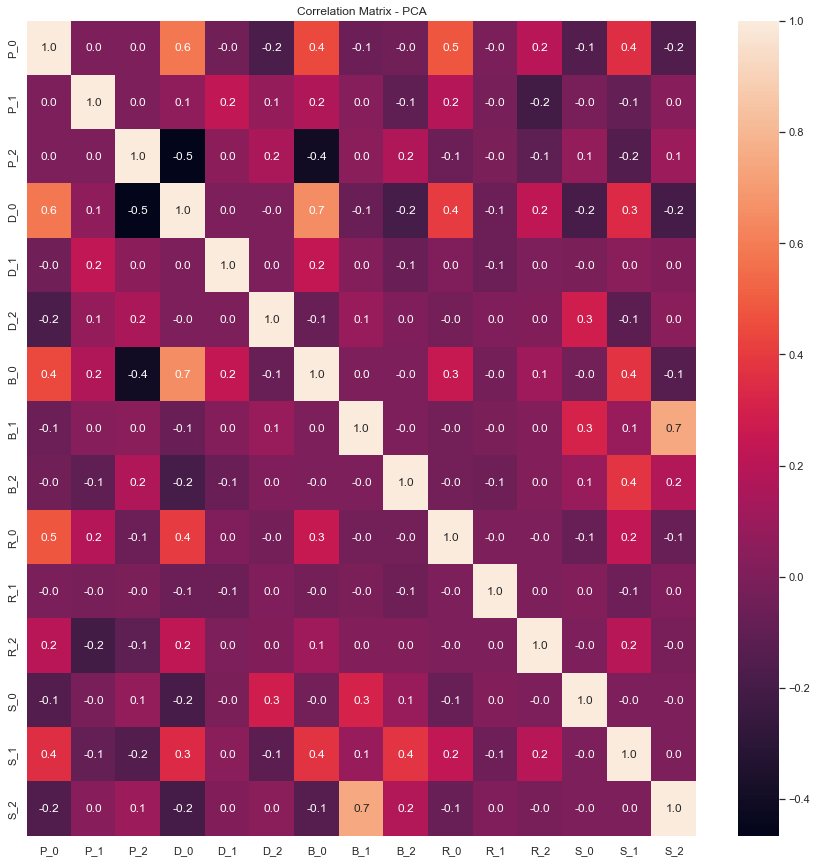

In [107]:
#Showing correlation between all the columns to make sure that we have 
#reduced the curse of dimensionality by using PCA

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
plt.figure(figsize=(15, 15))
sns.heatmap(master_df.iloc[:, 2:].corr(),annot = True, fmt='.1f')
plt.title('Correlation Matrix - PCA')
plt.show()

In [108]:
import statsmodels.api as sm
#add a constant column of oneto the end of the dataframe
Regression = sm.add_constant(master_df.iloc[:,2:])
#Perform logistic regression
logit_mod = sm.Logit(master_df['target'],Regression)
logit_res = logit_mod.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.295086
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  500
Model:                          Logit   Df Residuals:                      484
Method:                           MLE   Df Model:                           15
Date:                Fri, 15 Jul 2022   Pseudo R-squ.:                  0.5156
Time:                        07:05:00   Log-Likelihood:                -147.54
converged:                       True   LL-Null:                       -304.58
Covariance Type:            nonrobust   LLR p-value:                 6.605e-58
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6023      0.190     -8.422      0.000      -1.975      -1.229
P_0            0.8835      0.

/Users/krutikasarode/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


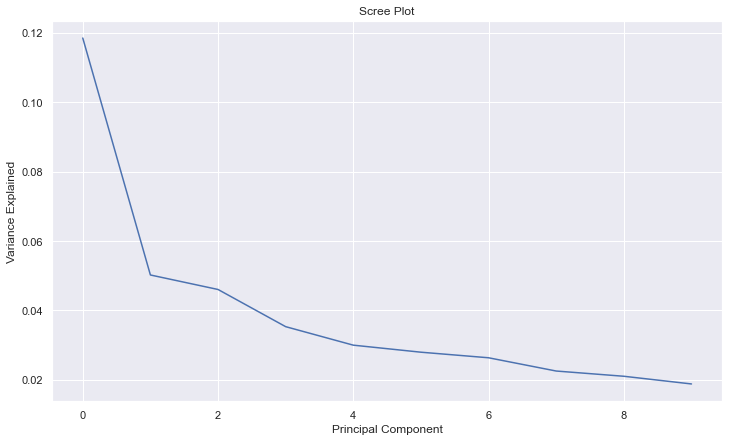

In [109]:
#After logistic regression we can see that there are still some components who's pval is greater than 0. That means they
#are not very relevant for predicting the target value. We can find out the optimum number of featrues required
pca_model=PCA(n_components=10,random_state=0)
pca_model.fit(pca_df)


plt.figure(figsize=(12, 7))
plt.plot(pca_model.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


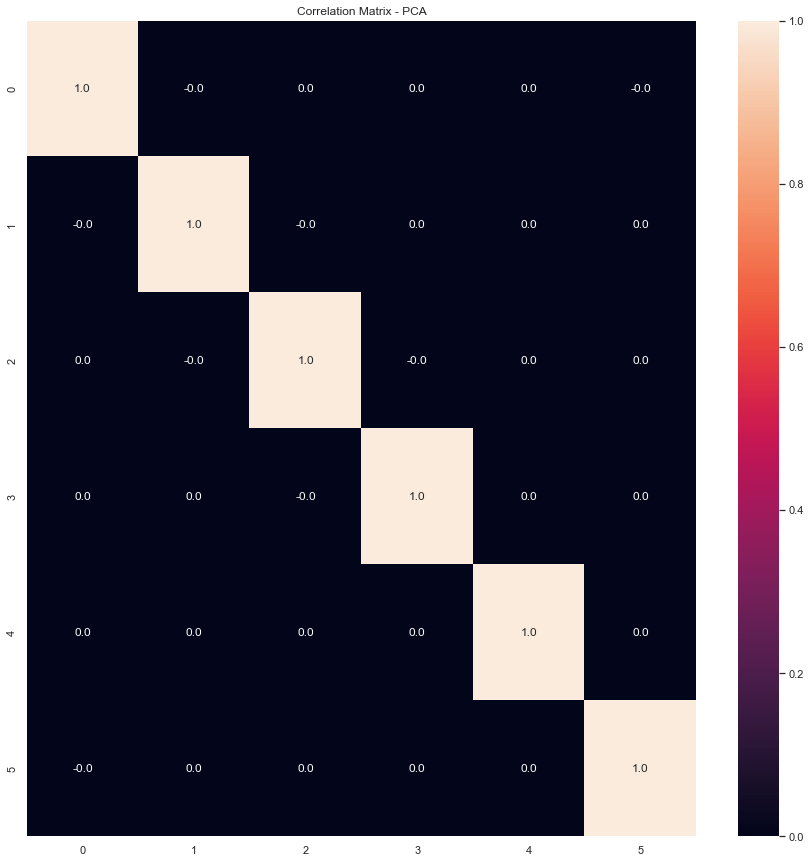

In [119]:
#optimal number of variable required ae 4-6. We can generate a model with 6 variables are check
pca_model=PCA(n_components=6,random_state=0)
pca_model.fit(pca_df)
temp=pd.DataFrame(pca_model.fit_transform(pca_df))
master_df=pd.concat([master_df.iloc[:,:2],temp],axis=1)

plt.figure(figsize=(15, 15))
sns.heatmap(master_df.iloc[:, 2:].corr(),annot = True, fmt='.1f')
plt.title('Correlation Matrix - PCA')
plt.show()

In [120]:
master_df.head(5)

,customer_ID,target,0,1,2,3,4,5
0,87613ee822b8472cdda5fc14d1489a914747dea88ff333...,1,2.046668,0.020510,-1.787140,-0.941271,1.868395,-2.125237
1,179a6ebfaed0e566684db57e97c630450103ecc3e0daea...,0,-3.195180,-0.330527,0.498558,2.086459,-1.969208,-0.461999
2,fd60fd38612355b04c5f0af6138a4751d1c9e6c654cf5d...,1,1.710487,2.931220,-2.241030,-3.233128,0.345711,10.900922
3,7c6a0bd179d158909f0194006a0c9a36dcd295797dd2d2...,0,-2.427343,-0.656410,-0.076712,-0.204983,0.487578,0.369078
4,9a071481eb440c0031a4b28c27e671b261200f950c49e3...,0,3.067272,0.911208,-0.953180,1.897899,-1.207581,-2.574498


In [121]:
#As we can see there's no correlation between any column component
regression=sm.add_constant(master_df.iloc[:,2:])
lr=sm.Logit(master_df['target'],regression)
result=lr.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.307691
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  500
Model:                          Logit   Df Residuals:                      493
Method:                           MLE   Df Model:                            6
Date:                Fri, 15 Jul 2022   Pseudo R-squ.:                  0.4949
Time:                        07:06:45   Log-Likelihood:                -153.85
converged:                       True   LL-Null:                       -304.58
Covariance Type:            nonrobust   LLR p-value:                 3.962e-62
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5961      0.188     -8.507      0.000      -1.964      -1.228
0              0.5494      0.

/Users/krutikasarode/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [132]:
#We can see that the distribution of target values ae uneven
print(master_df['target'].unique())
print(len(master_df[master_df['target']==1]))
print(len(master_df[master_df['target']==0]))

[1 0]
149
351


In [135]:
#Using SMOTE oversampling method to create balanced samples
#This is a part of data augmentation 
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(master_df.iloc[:,2:], master_df['target'])

In [155]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(master_df.iloc[:,2:], master_df['target'], test_size=0.3, random_state=42)

In [156]:
# Build a DataFrame To Score the Performance

performance_df = pd.DataFrame(columns = ['Model', 'Feature Selection', 'Accuracy', 'Log Loss', 'ROC', 'Amex Metric'])
performance_df

,Model,Feature Selection,Accuracy,Log Loss,ROC,Amex Metric


In [157]:
def amex_metric(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:

    def top_four_percent_captured(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        four_pct_cutoff = int(0.04 * df['weight'].sum())
        df['weight_cumsum'] = df['weight'].cumsum()
        df_cutoff = df.loc[df['weight_cumsum'] <= four_pct_cutoff]
        return (df_cutoff['target'] == 1).sum() / (df['target'] == 1).sum()
        
    def weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        df['random'] = (df['weight'] / df['weight'].sum()).cumsum()
        total_pos = (df['target'] * df['weight']).sum()
        df['cum_pos_found'] = (df['target'] * df['weight']).cumsum()
        df['lorentz'] = df['cum_pos_found'] / total_pos
        df['gini'] = (df['lorentz'] - df['random']) * df['weight']
        return df['gini'].sum()

    def normalized_weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        y_true_pred = y_true.rename(columns={'target': 'prediction'})
        return weighted_gini(y_true, y_pred) / weighted_gini(y_true, y_true_pred)

    g = normalized_weighted_gini(y_true, y_pred)
    d = top_four_percent_captured(y_true, y_pred)

    return 0.5 * (g + d)

In [158]:
import itertools
from sklearn.linear_model import LogisticRegression

def Logit_Randomize_CV(X,y,parameters,k=-1):
    key,values=zip(*parameters.items())
    print(key,values)
    result = [dict(zip(key, p)) for p in itertools.product(*values)]
    print(result)
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)
    b_score=0
    b_parameter={}
    b_model=None
    for i in result:
        logit=LogisticRegression(**i)
        logit.fit(train_X,train_y)
        y_pred=logit.predict(test_X)
        actual_data=pd.DataFrame({'target':train_y}).reset_index(drop=True)
        pred_data=pd.DataFrame({'prediction': logit.predict_proba(test_X)[:, 1]}).reset_index(drop=True)
        score = amex_metric(actual_data,pred_data)
        if score>b_score:
            b_score=score
            b_model=logit
            b_parameter=i
        print(f'{i}: {score}')
    print(f'Best Parameters - {b_parameter}: {b_score}')
    return b_model
        

In [159]:
print(train_X.head(2))
random_parameters = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                     'C' :[100, 10, 1.0, 0.1, 0.01]
                    }
k=-1
Logit = Logit_Randomize_CV(train_X,train_y, random_parameters,k)

            0         1         2         3         4         5
5   -3.708367 -0.871442  0.682926  1.910879 -1.449390 -0.041168
116  1.472621 -2.005695 -1.474598  3.132437  0.221017 -4.056128
('solver', 'C') (['newton-cg', 'lbfgs', 'liblinear'], [100, 10, 1.0, 0.1, 0.01])
[{'solver': 'newton-cg', 'C': 100}, {'solver': 'newton-cg', 'C': 10}, {'solver': 'newton-cg', 'C': 1.0}, {'solver': 'newton-cg', 'C': 0.1}, {'solver': 'newton-cg', 'C': 0.01}, {'solver': 'lbfgs', 'C': 100}, {'solver': 'lbfgs', 'C': 10}, {'solver': 'lbfgs', 'C': 1.0}, {'solver': 'lbfgs', 'C': 0.1}, {'solver': 'lbfgs', 'C': 0.01}, {'solver': 'liblinear', 'C': 100}, {'solver': 'liblinear', 'C': 10}, {'solver': 'liblinear', 'C': 1.0}, {'solver': 'liblinear', 'C': 0.1}, {'solver': 'liblinear', 'C': 0.01}]
{'solver': 'newton-cg', 'C': 100}: -0.015459583186821918
{'solver': 'newton-cg', 'C': 10}: -0.015459583186821918
{'solver': 'newton-cg', 'C': 1.0}: -0.015459583186821918
{'solver': 'newton-cg', 'C': 0.1}: -0.0147739106326

In [162]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

pred=Logit.predict(test_X)
amex_actual = pd.DataFrame({'target':test_y}).reset_index(drop=True)
amex_prediction = pd.DataFrame({'prediction': Logit.predict_proba(test_X)[:, 1]}).reset_index(drop=True)
Performance_df = performance_df.append(pd.DataFrame([['Logit', 'Full', accuracy_score(test_y, pred), log_loss(test_y, pred), roc_auc_score(test_y, pred), amex_metric(amex_actual,amex_prediction)]],
                                                    columns = ['Model', 'Feature Selection','Accuracy', 'Log Loss', 'ROC','Amex Metric']), sort = False)

print('Accuracy:', accuracy_score(test_y, pred))
print('Log Loss:', log_loss(test_y, pred))
print('ROC Accuracy:', roc_auc_score(test_y, pred))
print('Confusion Matrix:\n', 
       confusion_matrix(test_y, pred))
print('Amex Metric:', amex_metric(amex_actual,amex_prediction))

Accuracy: 0.86
Log Loss: 4.835471340483773
ROC Accuracy: 0.8011363636363636
Confusion Matrix:
 [[102   8]
 [ 13  27]]
Amex Metric: 0.7402966517948508
